In [1]:
import keras
from keras.datasets import cifar10
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization

Using TensorFlow backend.


In [2]:
import cv2
import numpy as np
import pandas as pd
import os, shutil, random, glob

In [3]:
# pre-process training and testing data (load file names and give labels)

import os
import numpy as np
import cv2

resize = 224

def load_data():

    train_folder = './dataset/trainGender/'

    train_imgs = os.listdir( train_folder )
    
    num_train_imgs = len(train_imgs)
    train_data = np.empty((num_train_imgs, resize, resize, 3), dtype="int32")
    train_label = np.empty((num_train_imgs, ), dtype="int32")
    
    index_data = 0
    male_keyword =  '_male'
    female_keyword = '_female'
    
    for train_img in train_imgs:
        train_data[index_data] = cv2.resize( cv2.imread( train_folder+train_img ), (resize, resize) )
        if male_keyword in train_img:
            train_label[index_data] = 1
        elif female_keyword in train_img:
            train_label[index_data] = 0
        else: 
            print('cannot give any train_label for the image name: ' + train_img)
        index_data += 1
    
    print( 'label of training data: \n' + str(train_label[:num_train_imgs]) )
    
    ######################################################
    
    test_folder = './dataset/testGender/'

    test_imgs = os.listdir( test_folder )
    
    num_test_imgs = len(test_imgs)
    test_data = np.empty((num_test_imgs, resize, resize, 3), dtype="int32")
    test_label = np.empty((num_test_imgs, ), dtype="int32")
    
    index_data = 0
    male_keyword =  '_male'
    female_keyword = '_female'
    
    for test_img in test_imgs:
        test_data[index_data] = cv2.resize( cv2.imread( test_folder+test_img ), (resize, resize) )
        if male_keyword in test_img:
            test_label[index_data] = 1
        elif female_keyword in test_img:
            test_label[index_data] = 0
        else: 
            print('cannot give any test_label for the image name: ' + test_img)
        index_data += 1
    
    print( 'label of testing data: \n' + str(test_label[:num_test_imgs]) )
    
    ######################################################
    
    return train_data, train_label, test_data, test_label


In [4]:
train_data, train_label, test_data, test_label = load_data()
print('label shape of trainging data: ' + str(train_label.shape) )
print('label shape of testting data: ' + str(test_label.shape) )

label of training data: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0


In [5]:
train_data, test_data = train_data.astype('float32'), test_data.astype('float32')
train_data, test_data = train_data/255, test_data/255

In [6]:
# one-hot encoding

test_label_original = test_label
# note: run 'keras.utils.to_categorical' for only one time (no mistake-proofing)
train_label = keras.utils.to_categorical(train_label, 2)
test_label = keras.utils.to_categorical(test_label, 2)

print(train_label.shape )
print(test_label.shape )

(800, 2)
(200, 2)


In [7]:
### load classification models ########################################################
from keras.models import load_model

In [8]:
# load AlexNet (pre-trained in 'pre_trained_model_AlexNet.h1')
import numpy as np

model_1 = load_model('pre_trained_model_AlexNet.h1')
predict_result_1 = model_1.predict(test_data,verbose=1)

score, acc = model_1.evaluate(test_data, test_label, verbose=1)
print('Test score:', score) # loss function
print('Test accuracy:', acc) # accuracy

200/200 [==============================] - 5s 24ms/step
Test score: 0.37890216588974
Test accuracy: 0.81


In [9]:
# load googleNet (pre-trained in 'pre_trained_model_GoogLeNet.h2')
import numpy as np

model_2 = load_model('pre_trained_model_GoogLeNet.h2')
predict_result_2 = model_2.predict(test_data,verbose=1)

score, acc = model_2.evaluate(test_data, test_label, verbose=1)
print('Test score:', score) # loss function
print('Test accuracy:', acc) # accuracy

200/200 [==============================] - 10s 52ms/step
Test score: 0.28913108944892885
Test accuracy: 0.84


In [10]:
# load ResNet (pre-trained in 'pre_trained_model_ResNet.h3')
import numpy as np

model_3 = load_model('pre_trained_model_ResNet.h3')
predict_result_3 = model_3.predict(test_data,verbose=1)

score, acc = model_3.evaluate(test_data, test_label, verbose=1)
print('Test score:', score) # loss function
print('Test accuracy:', acc) # accuracy

200/200 [==============================] - 23s 115ms/step
Test score: 0.4376073980331421
Test accuracy: 0.825


In [11]:
# bagging 
result = (predict_result_1+predict_result_2+predict_result_3)/3

In [12]:
result = np.array(result)
print(result)

[[0.30188248 0.6981175 ]
 [0.38631764 0.6136823 ]
 [0.12362037 0.87637955]
 [0.11580688 0.8841932 ]
 [0.02214746 0.9778525 ]
 [0.60268223 0.3973178 ]
 [0.6185885  0.38141152]
 [0.09510604 0.90489393]
 [0.06614915 0.9338508 ]
 [0.09574198 0.904258  ]
 [0.24292648 0.7570736 ]
 [0.04032276 0.9596772 ]
 [0.3245081  0.675492  ]
 [0.81707305 0.1829269 ]
 [0.5433962  0.45660385]
 [0.08963257 0.9103674 ]
 [0.97345334 0.0265466 ]
 [0.9842582  0.0157418 ]
 [0.04140398 0.958596  ]
 [0.9797654  0.02023459]
 [0.02955519 0.97044486]
 [0.98301125 0.01698884]
 [0.05749666 0.9425033 ]
 [0.08500159 0.9149985 ]
 [0.9817109  0.01828902]
 [0.01135921 0.9886408 ]
 [0.06489342 0.9351066 ]
 [0.9830141  0.01698584]
 [0.95875883 0.04124118]
 [0.9879615  0.01203855]
 [0.977335   0.02266502]
 [0.98484063 0.01515941]
 [0.9729889  0.02701105]
 [0.41995323 0.5800468 ]
 [0.7246476  0.27535242]
 [0.97321576 0.02678433]
 [0.6950645  0.30493551]
 [0.39729917 0.60270077]
 [0.573422   0.42657802]
 [0.6913521  0.30864784]


In [13]:
result = np.where(result > 0.5, 1, 0)
print(result)

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]

In [14]:
import numpy

result_a = numpy.array([])

for item in result:
    if np.array_equal(item, [1,0]):
        result_a = numpy.append (result_a, [0])
        print(result_a)
    elif np.array_equal(item, [0,1]):
        result_a = numpy.append (result_a, [1])
        print(result_a)
    else:
        print('an item in result is wrong: '+ item)

[1.]
[1. 1.]
[1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0. 0.]
[1. 1. 1. 1. 1. 0. 0. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.]
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 

In [15]:
import pandas as pd
pd.crosstab(test_label_original, result_a, rownames=['label'], colnames=['predict'])

predict,0.0,1.0
label,,
0,78,22
1,8,92


In [16]:
# calculate accuracy
def my_accuracy(original_array, result_array):
    len_original = len(original_array)
    len_result = len(result_array)
    same = 0 
    if len_original != len_result:
        print('len is wrong~~~')
    for index in range(len_original):
        if(original_array[index] == result_array[index]):
            same += 1
    accuracy = same / len_original
    return accuracy 

In [17]:
# accuracy after baggging
my_accuracy(test_label_original, result_a)

0.85

In [18]:
######################################################

In [19]:
from sklearn.metrics import classification_report
print(classification_report(test_label_original, result_a, digits=4))

              precision    recall  f1-score   support

           0     0.9070    0.7800    0.8387       100
           1     0.8070    0.9200    0.8598       100

   micro avg     0.8500    0.8500    0.8500       200
   macro avg     0.8570    0.8500    0.8493       200
weighted avg     0.8570    0.8500    0.8493       200



In [20]:
print(test_label_original)

[1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0]


In [21]:
print(result_a)

[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1.]


In [22]:
dictionary = {1:'male', 0:'female'}
def display_test(i):
    print('ground truth:', dictionary[ test_label_original[i] ] ) 
    print('predicted result:', dictionary[ result_a[i] ] )

In [23]:
def different_index():
    index_list = []
    for index in range(200):
        if test_label_original[index] != result_a[index]:
            index_list.append(index)
    return index_list

In [24]:
differernt_index_list = different_index()
print(differernt_index_list)

[33, 37, 40, 41, 58, 59, 64, 71, 72, 76, 80, 82, 105, 106, 110, 113, 114, 122, 124, 125, 128, 148, 149, 176, 186, 187, 188, 190, 193, 199]


In [27]:
import matplotlib.pyplot as plt

img = train_data[0]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

ground truth: female
predicted result: male


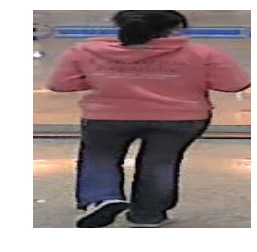

In [28]:
display_test(33)
img = test_data[33]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

ground truth: female
predicted result: male


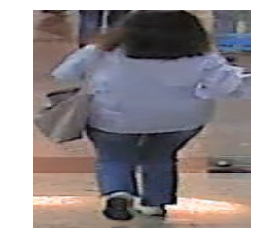

In [29]:
display_test(40)
img = test_data[40]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

ground truth: female
predicted result: male


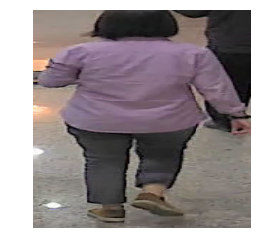

In [30]:
display_test(72)
img = test_data[72]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

ground truth: male
predicted result: female


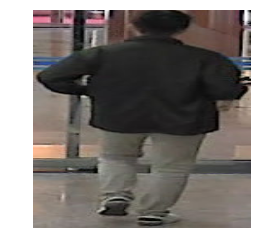

In [31]:
display_test(80)
img = test_data[80]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

ground truth: male
predicted result: female


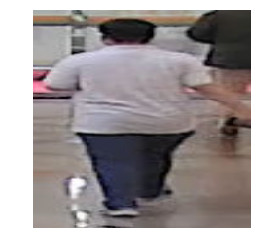

In [32]:
display_test(82)
img = test_data[82]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

ground truth: female
predicted result: male


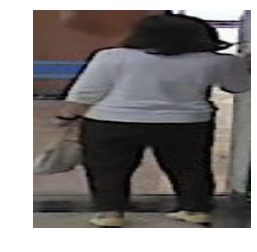

In [33]:
display_test(124)
img = test_data[124]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

ground truth: female
predicted result: male


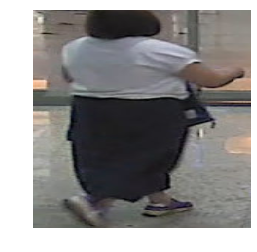

In [34]:
display_test(193)
img = test_data[193]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()